In [1]:
import sys
sys.path.insert(0, "../../python")

import os
from ionization import ionization
from ionization import adk
from propagation import propagation
from propagation import laser
from lens import profile
from lens import bessel
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate
from numpy.fft import fft, ifft, fft2, ifft2, fftfreq, fftshift
from scipy.special import jn
from ht import intht
path = '/media/robert/Data_Storage/Data/Ionization/MultiOrderBessel/TwoOrder300um/'

In [2]:
# Create the desired intensity profile
ion = {'atom' : ionization.H2,
       'tau' : 50,
       'type' : 'gaussian'}
z0 = 1.5e6
zf = 50e6
dz = 1e6
sigmaIn = 15e4
sigmaOut = 15e4
N = 10000
z, I = profile.smoothed_gaussian_ramps(z0, dz, sigmaIn, sigmaOut, ion, N, zf)

In [3]:
# Lets test the automated function
prop = {'Nx' : 2**10,
        'Ny' : 2**8,
        'Nz' : 2**8,
        'X' : 10e3,
        'Y' : 10e3,
        'Z' : 4e6,
        'E0' : 1.0,
        'lam' : 0.8,
        'n' : 1.0
        }
params = {'L' : 2,
          'N' : 1000,
          'M' : 1000,
          'R' : [0.3e3, 0.3e3],
          'lam' : 0.8,
          'rmax' : [20e3, 20e3],
          'prop' : prop,
          'order' : [0, 1],
          'atom' : ionization.H2,
          'tau' : ion['tau'],
          'multi' : [1.0, 1.8],
          'xlim' : [-1000, 1000]
         }
params['path'] = path

In [4]:
bessel.multimode_ionization(params, z, I)

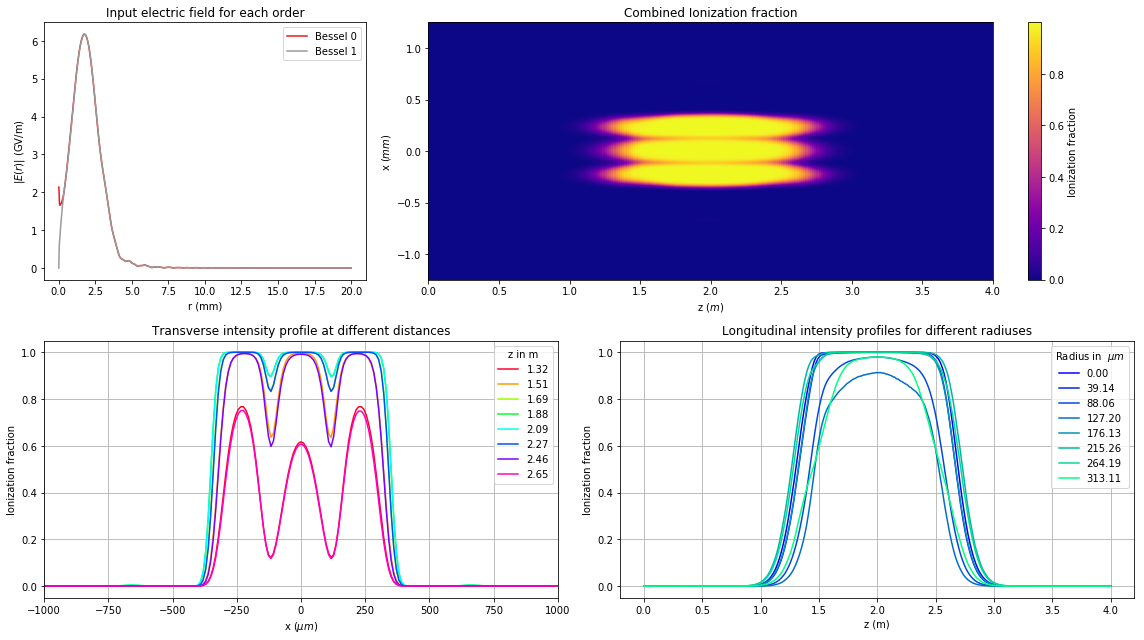

In [5]:
bessel.ionization_plot(path, 8)

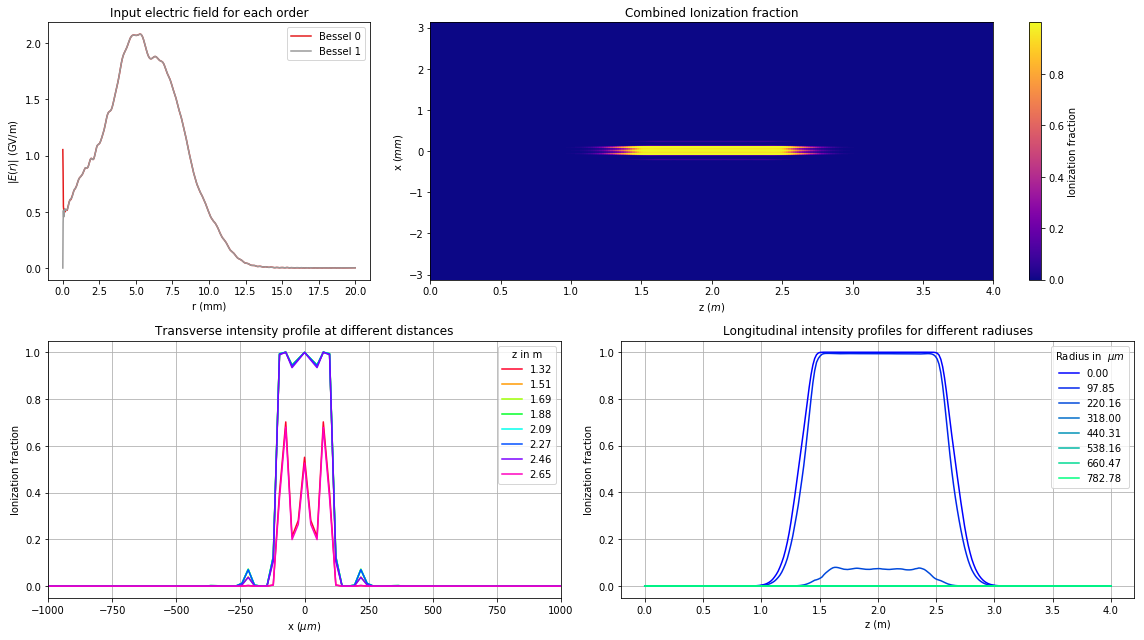

In [6]:
params['path'] = '/media/robert/Data_Storage/Data/Ionization/MultiOrderBessel/TwoOrder100um/'
params['prop']['X'] = 25e3
params['prop']['Y'] = 25e3
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
params['R'] = [0.1e3, 0.1e3]
bessel.multimode_ionization(params, z, I)
bessel.ionization_plot(params['path'], 8)

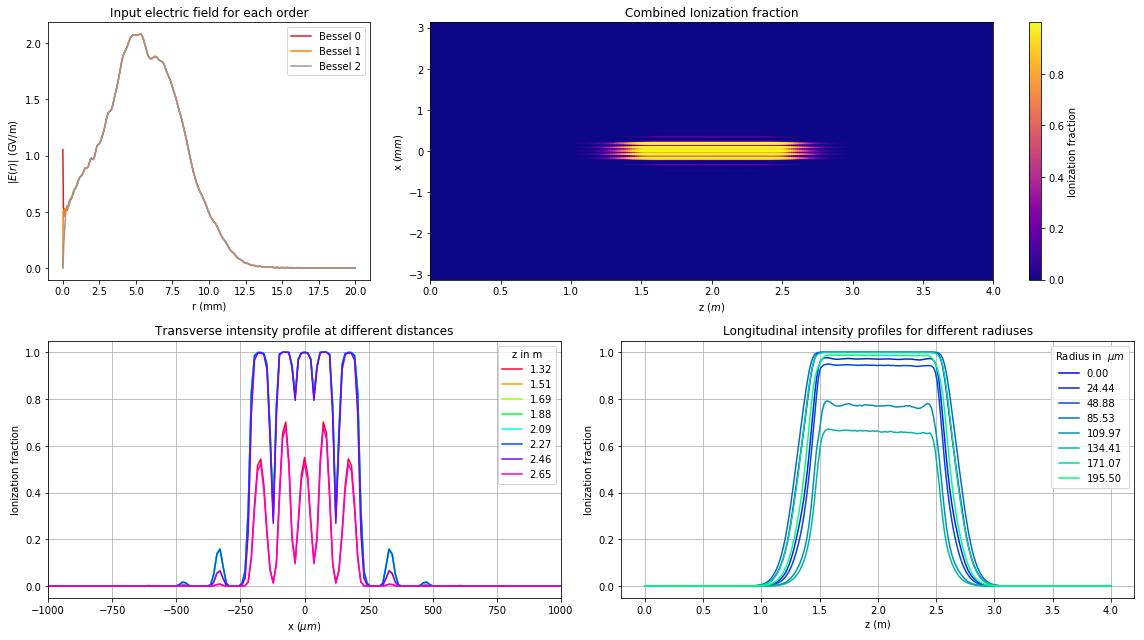

In [5]:
params['path'] = '/media/robert/Data_Storage/Data/Ionization/MultiOrderBessel/ThreeOrder100um/'
params['L'] = 3
params['prop']['Nx'] = 2**11
params['prop']['X'] = 25e3
params['prop']['Y'] = 25e3
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
params['order'] = [0, 1, 3]
params['R'] = [0.1e3, 0.1e3, 0.1e3]
params['rmax'] = [20e3, 20e3, 20e3]
params['multi'] = [1.0, 1.8, 2.3]
#bessel.multimode_ionization(params, z, I)
bessel.ionization_plot(params['path'], 8, 25)

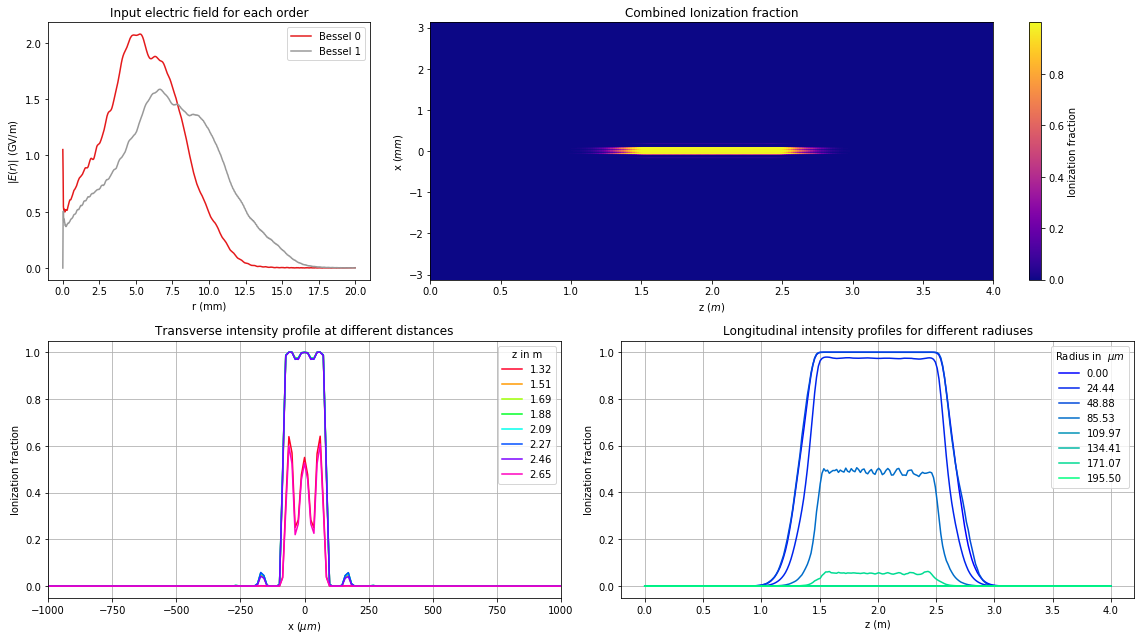

In [12]:
params['path'] = '/media/robert/Data_Storage/Data/Ionization/MultiOrderBessel/ThreeOrder100umCentral/'
params['L'] = 2
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
params['order'] = [0, 1]
params['R'] = [0.1e3, 0.075e3]
params['rmax'] = [20e3, 20e3]
params['multi'] = [1.0, 1.8]
bessel.multimode_ionization(params, z, I)
bessel.ionization_plot(params['path'], 8, 25)